In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Dateien laden
with np.load('prediction-challenge-02-data.npz') as fh:
    data = fh['data_x']
    label = fh['data_y']
    test_data = fh['test_x']

In [219]:
pic_classifier = tf.estimator.Estimator(
      model_fn=deep_cnn, model_dir="/tmp/mnist_convnet_model")

# Set up logging for predictions
# Log the values in the "Softmax" tensor with label "probabilities"
tensors_to_log = {"probabilities": "softmax_tensor"}
logging_hook = tf.train.LoggingTensorHook(
    tensors=tensors_to_log, every_n_iter=60)
    
#daten laden und shufflen
#shuffleindex
shuffle_index=np.arange(6000)
np.random.shuffle(shuffle_index)
with np.load('prediction-challenge-02-data.npz') as fh:
    data = fh['data_x'][shuffle_index]
    label = fh['data_y'][shuffle_index]
    test_data = fh['test_x']
#split datan in trainings und validation daten
train_data = tf.convert_to_tensor(data[:5000])
train_label = tf.convert_to_tensor(label[:5000])
eval_data = data[5000:]
eval_label = label[5000:]
    
def input_train():
    features=tf.convert_to_tensor(data[:5000])
    labels=tf.convert_to_tensor(label[:5000])
    return (features,labels)
pic_classifier.train(
    input_fn=input_train(),
    steps=20000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f4f90e692b0>, '_task_type': 'worker', '_save_checkpoints_steps': None, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_session_config': None, '_log_step_count_steps': 100, '_keep_checkpoint_max': 5, '_task_id': 0, '_save_summary_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_is_chief': True, '_master': '', '_num_worker_replicas': 1, '_model_dir': '/tmp/mnist_convnet_model'}


TypeError: unsupported callable

In [212]:
features=tf.convert_to_tensor(data[:5000])
labels=tf.convert_to_tensor(label[:5000])

features,labels

(<tf.Tensor 'Const_161:0' shape=(5000, 3, 32, 32) dtype=float32>,
 <tf.Tensor 'Const_162:0' shape=(5000,) dtype=int64>)

In [217]:
input_train()==(features,labels)

False

In [186]:
train_input_fn
sess=tf.Session()
a=sess.run(train_input_fn)
a

TypeError: Fetch argument <function numpy_input_fn.<locals>.input_fn at 0x7f4f9acdbb70> has invalid type <class 'function'>, must be a string or Tensor. (Can not convert a function into a Tensor or Operation.)

In [160]:
#Dateien laden und shufflen (shufflen ist6 immer gut)
with np.load('prediction-challenge-02-data.npz') as fh:
    data_shuffle_index=np.arange(6000)
    np.random.shuffle(data_shuffle_index)
    data_x = fh['data_x'][data_shuffle_index]
    data_y = fh['data_y'][data_shuffle_index]
    test_x = fh['test_x']

# TRAINING DATA: INPUT (x) AND OUTPUT (y)
# 1. INDEX: IMAGE SERIAL NUMBER (6000)
# 2. INDEX: COLOR CHANNELS (3)
# 3/4. INDEX: PIXEL VALUE (32 x 32)
"""print(data_x.shape, data_x.dtype)
print(data_y.shape, data_y.dtype)"""

# TEST DATA: INPUT (x) ONLY
"""print(test_x.shape, test_x.dtype)"""

#Daten ausgeben
# neuer shape mit (n,32,32,3) (plt.imshow compatibel)
"""data_x=np.rollaxis(data_x,1,4)
test_x=np.rollaxis(test_x,1,4)"""
#n=0-6000
"""n=5001
plt.imshow(data_x[n])"""
#titel beschreiben
"""def tier(x):
    if x==0:
        return"cat"
    elif x==1:
        return"dog"
    elif x==2:
        return "frog"
    else:
        return"error"
plt.title(tier(data_y[n]))
plt.show()"""
#generiere mehr testdaten


############################################
# TRAIN MODEL ON data_x, data_y

# PREDICT prediction FROM test_x

# MAKE SURE THAT YOU HAVE THE RIGHT FORMAT
"""assert prediction.ndim == 1
assert prediction.shape[0] == 300"""

# AND SAVE EXACTLY AS SHOWN BELOW
"""np.save('prediction.npy', prediction)"""

(6000, 3, 32, 32) float32
(6000,) int64


"np.save('prediction.npy', prediction)"

In [23]:
b=np.array([0, 2, 1, 0, 0, 2, 2, 1, 2, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 2, 0, 2, 2, 1, 1, 0, 0, 0, 2, 1, 2, 1, 1, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0, 2,
       0, 1, 1, 2, 0, 1, 2, 0, 2, 1, 2, 2, 1, 1, 0, 1, 0, 0, 0, 1, 2, 1,
       2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 0, 0, 1, 2, 0, 1, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 2,
       0, 2, 2, 2, 2, 1, 0, 2, 0, 2, 0, 1, 0, 1, 2, 1, 2, 2, 2, 1, 0, 2,
       0, 1, 0, 2, 0, 1, 2, 2, 1, 0, 2, 1, 2, 2, 1, 1, 0, 1, 2, 1, 1, 0,
       2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 2, 0,
       0, 0, 2, 0, 0, 0, 1, 1, 1, 0, 2, 2, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 2, 2, 2, 2, 0, 1, 1, 2, 2, 1, 2, 2,
       0, 0, 2, 1, 1, 1, 0, 2, 1, 0, 1, 0, 1, 2, 1, 1, 0, 0, 2, 2, 0, 0,
       0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 2, 1, 2, 1, 1, 0, 2, 1, 1,
       2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 2, 0, 2,
       2, 0, 2, 2, 0, 2, 2, 1, 1, 2, 1, 1])
print(b.shape)
b

(300,)


array([0, 2, 1, 0, 0, 2, 2, 1, 2, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 2, 0, 2, 2, 1, 1, 0, 0, 0, 2, 1, 2, 1, 1, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0, 2,
       0, 1, 1, 2, 0, 1, 2, 0, 2, 1, 2, 2, 1, 1, 0, 1, 0, 0, 0, 1, 2, 1,
       2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 0, 0, 1, 2, 0,
       1, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 2, 0, 2, 2, 2, 2, 1, 0, 2, 0, 2,
       0, 1, 0, 1, 2, 1, 2, 2, 2, 1, 0, 2, 0, 1, 0, 2, 0, 1, 2, 2, 1, 0,
       2, 1, 2, 2, 1, 1, 0, 1, 2, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 0,
       2, 2, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 2, 2, 2, 2, 0, 1, 1, 2, 2, 1,
       2, 2, 0, 0, 2, 1, 1, 1, 0, 2, 1, 0, 1, 0, 1, 2, 1, 1, 0, 0, 2, 2,
       0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 2, 1, 2, 1, 1, 0, 2,
       1, 1, 2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 2,
       0, 2, 2, 0, 2, 2, 0, 2, 2, 1, 1, 2, 1, 1])

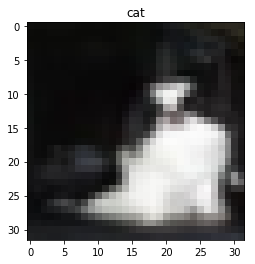

0


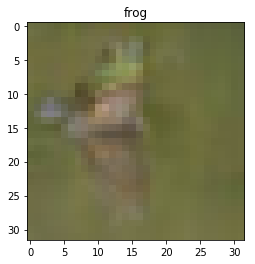

1


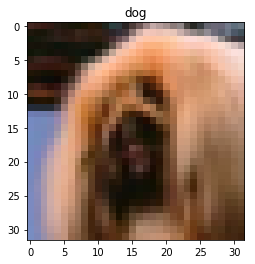

2


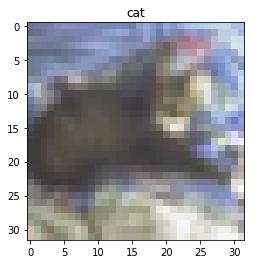

3


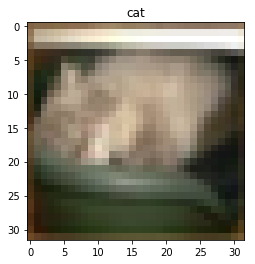

4


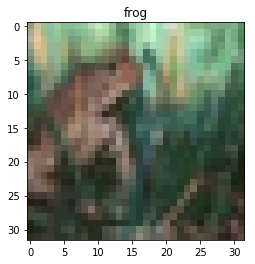

5


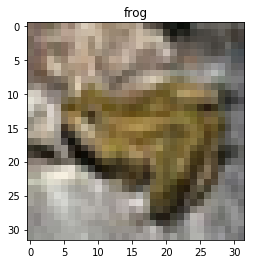

6


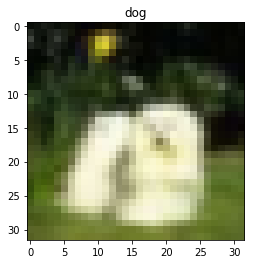

7


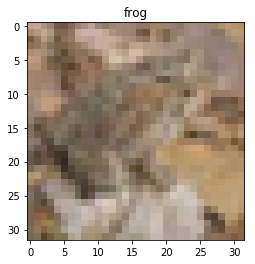

8


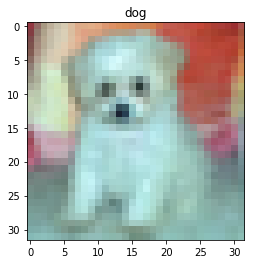

9


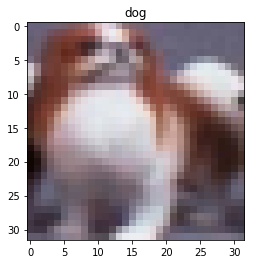

10


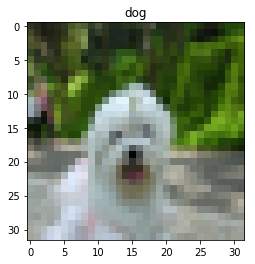

11


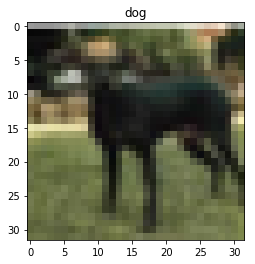

12


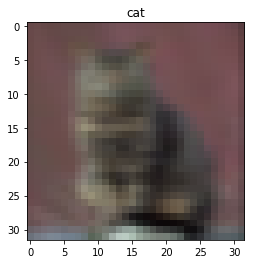

13


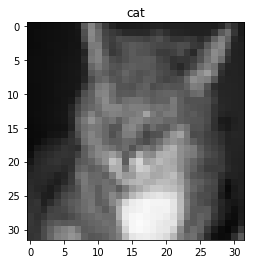

14


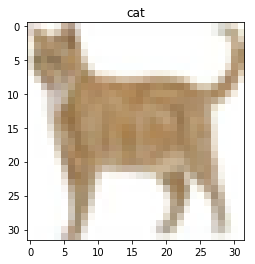

15


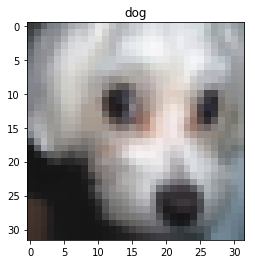

16


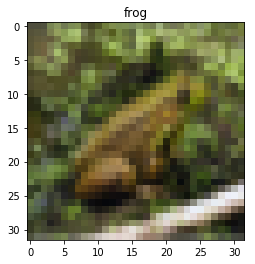

17


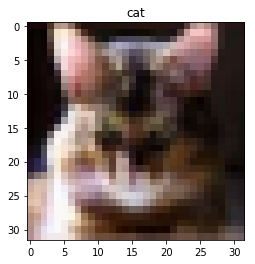

18


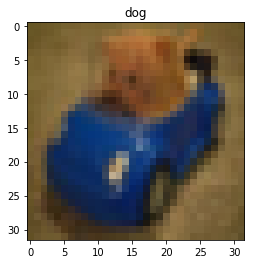

19


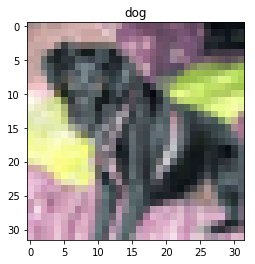

20


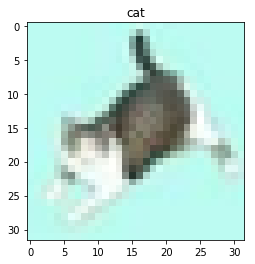

21


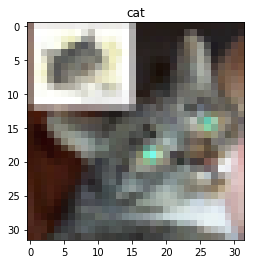

22


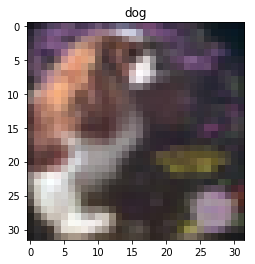

23


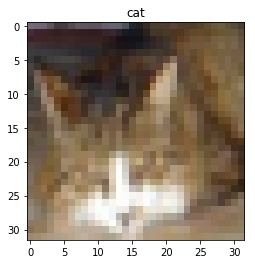

24


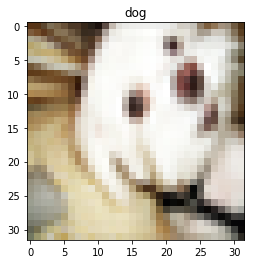

25


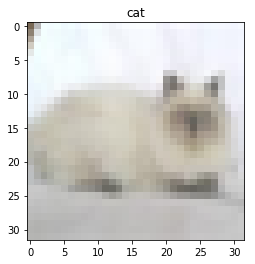

26


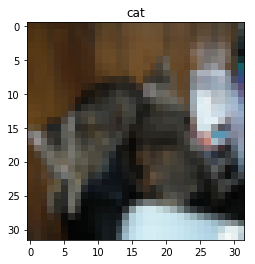

27


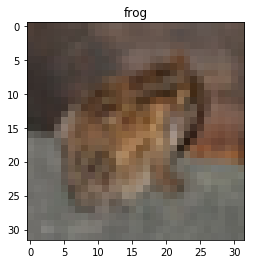

28


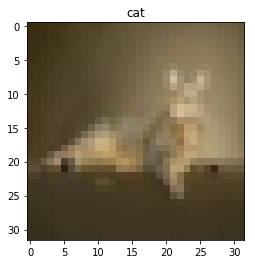

29


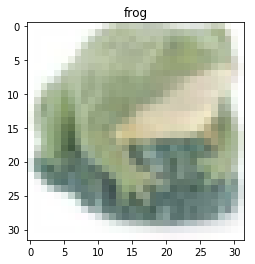

30


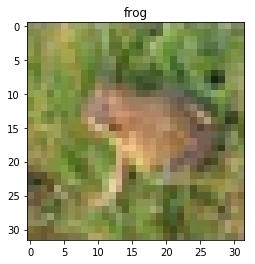

31


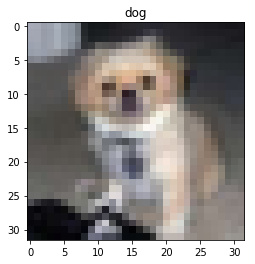

32


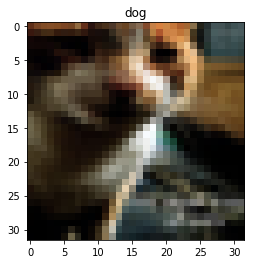

33


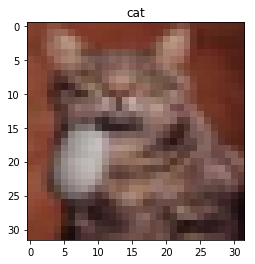

34


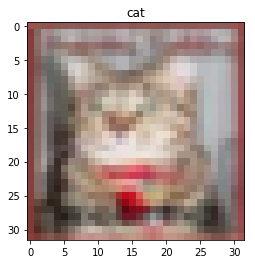

35


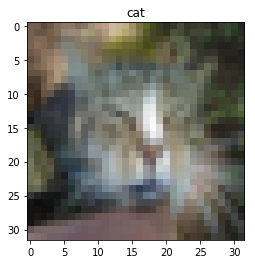

36


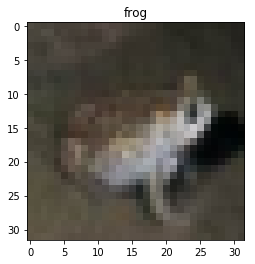

37


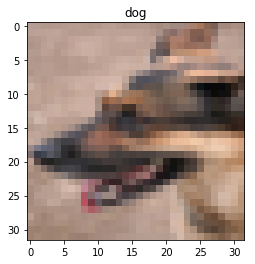

38


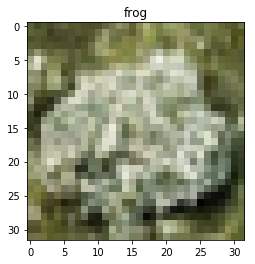

39


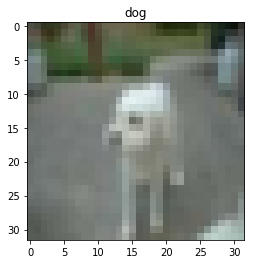

40


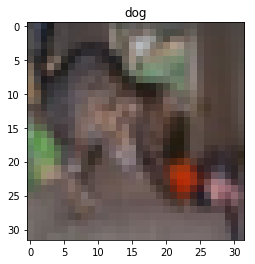

41


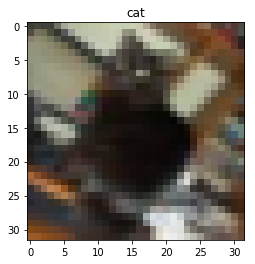

42


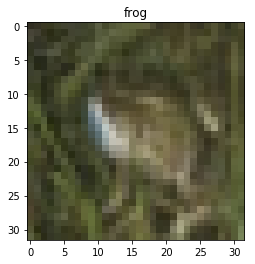

43


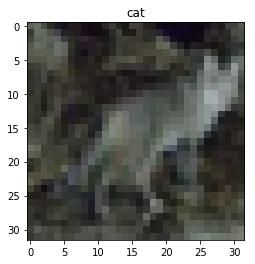

44


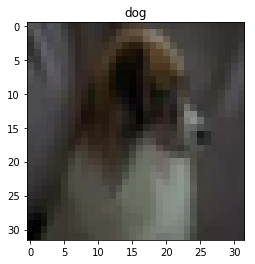

45


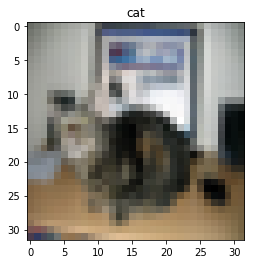

46


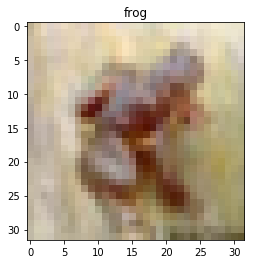

47


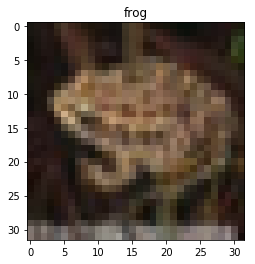

48


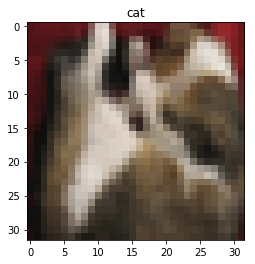

49


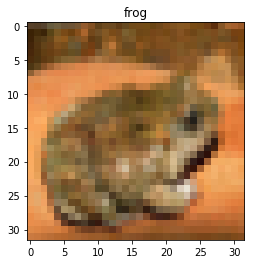

50


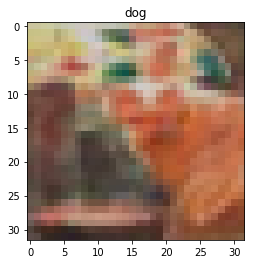

51


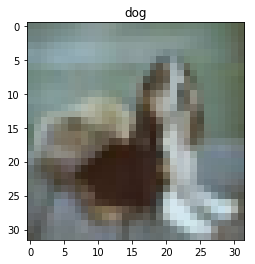

52


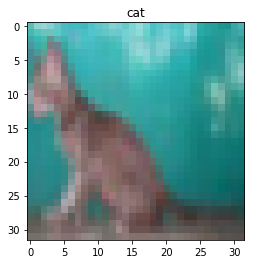

53


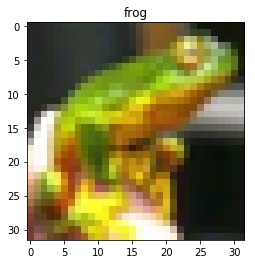

54


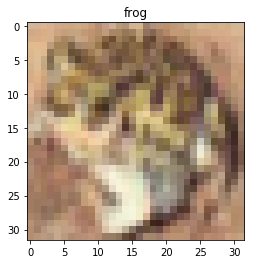

55


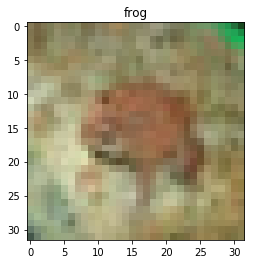

56


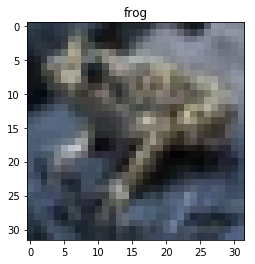

57


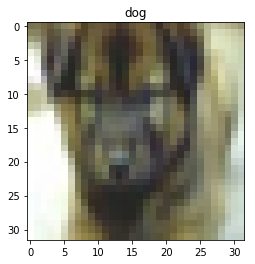

58


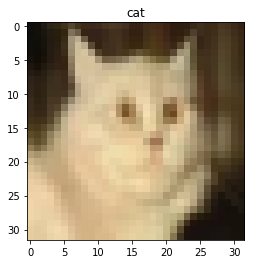

59


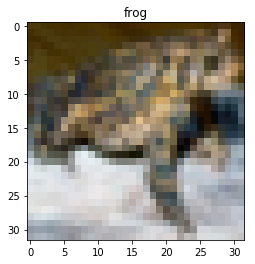

60


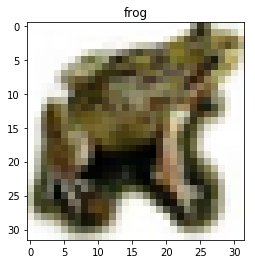

61


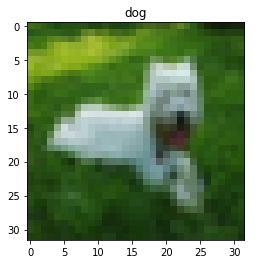

62


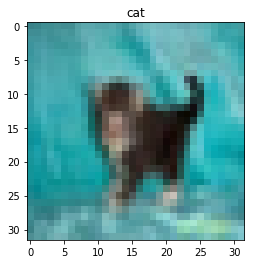

63


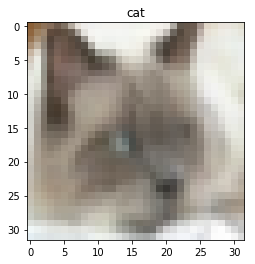

64


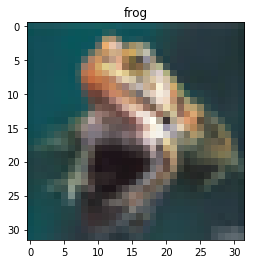

65


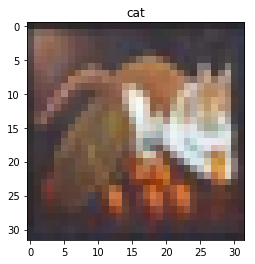

66


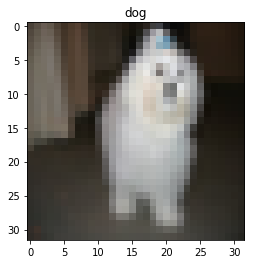

67


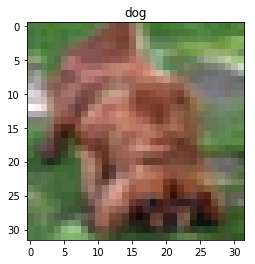

68


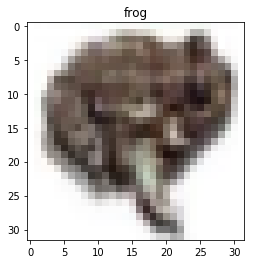

69


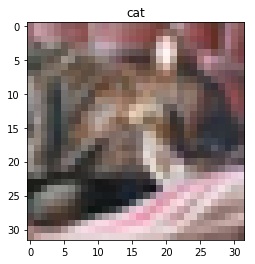

70


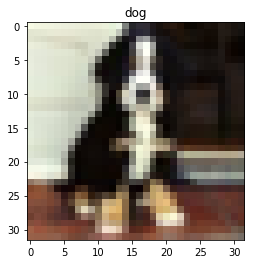

71


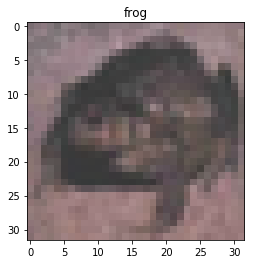

72


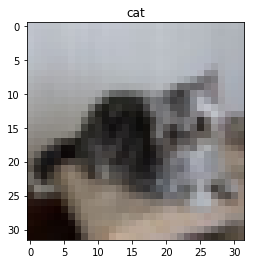

73


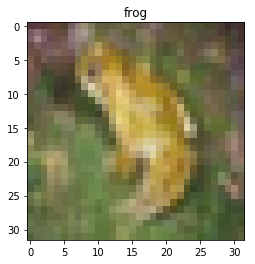

74


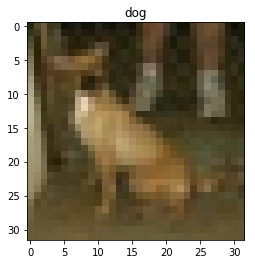

75


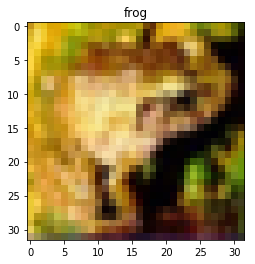

76


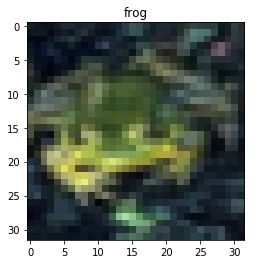

77


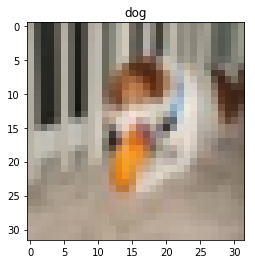

78


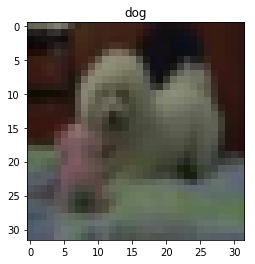

79


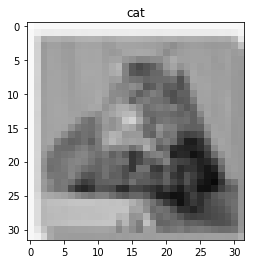

80


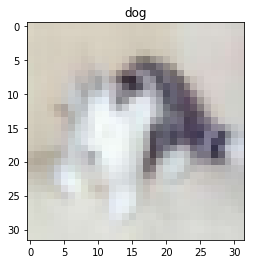

81


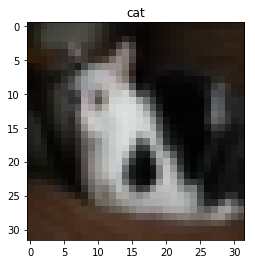

82


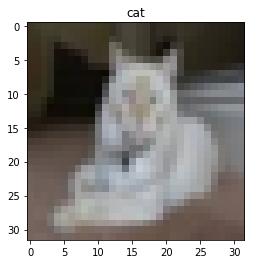

83


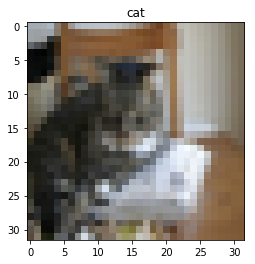

84


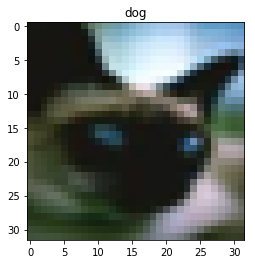

85


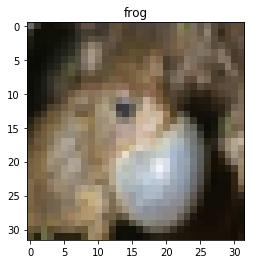

86


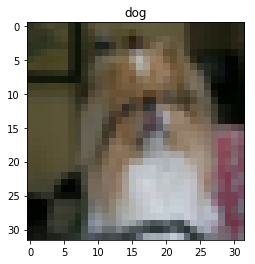

87


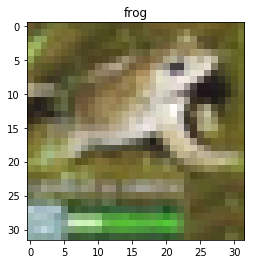

88


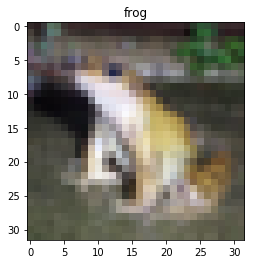

89


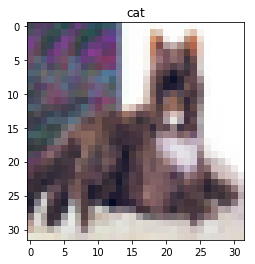

90


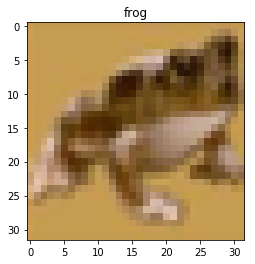

91


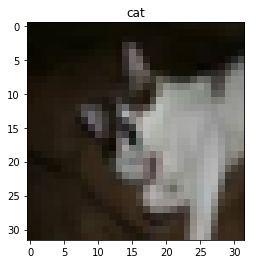

92


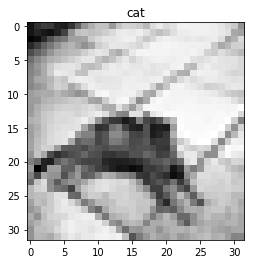

93


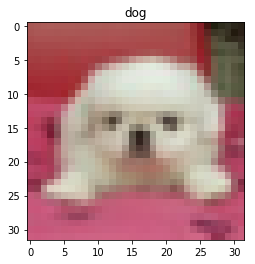

94


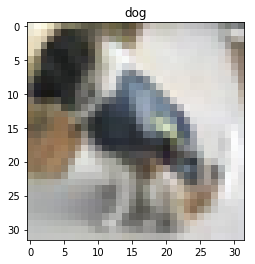

95


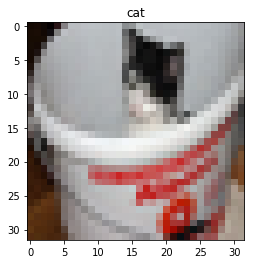

96


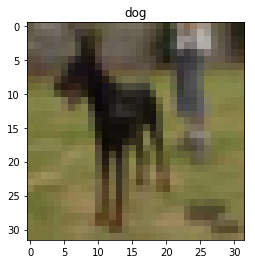

97


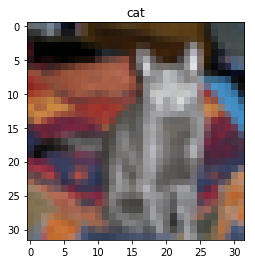

98


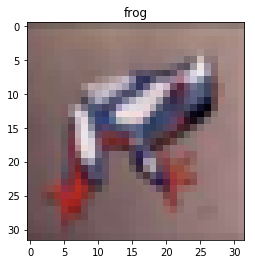

99


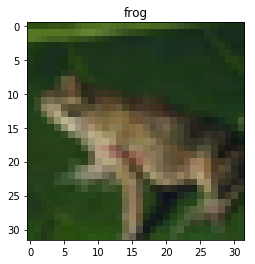

100


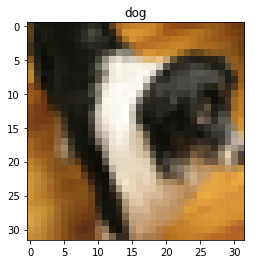

101


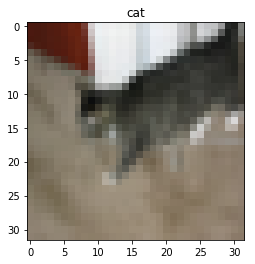

102


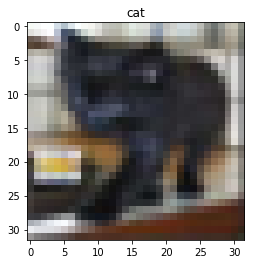

103


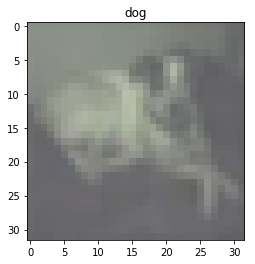

104


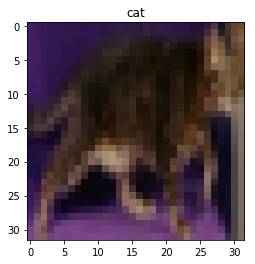

105


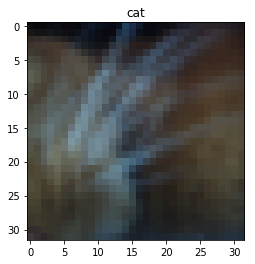

106


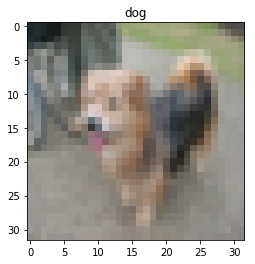

107


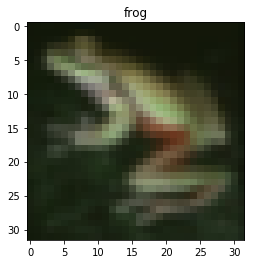

108


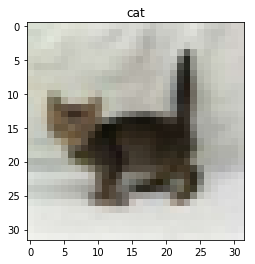

109


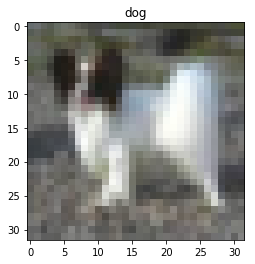

110


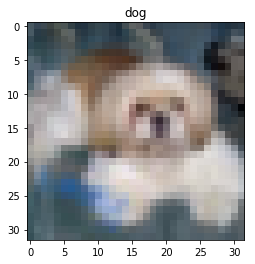

111


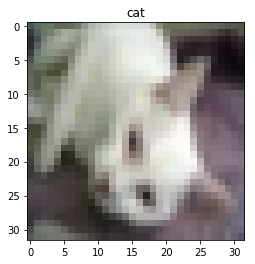

112


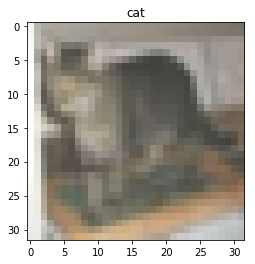

113


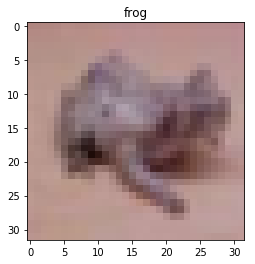

114


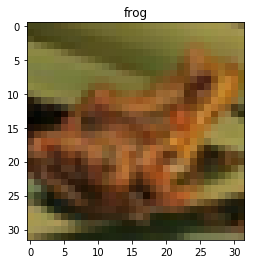

115


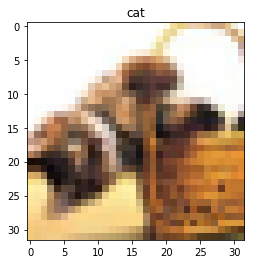

116


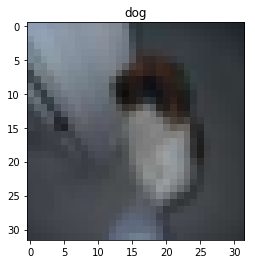

117


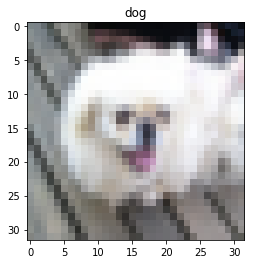

118


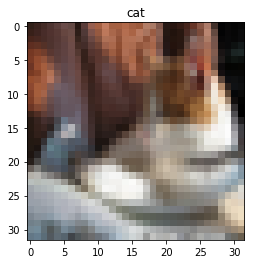

119


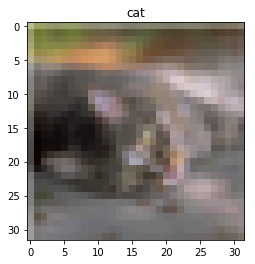

120


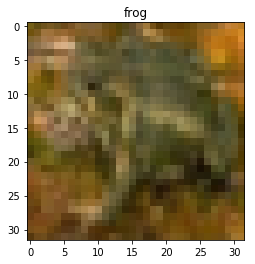

121


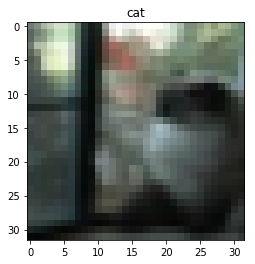

122


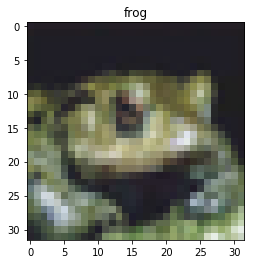

123


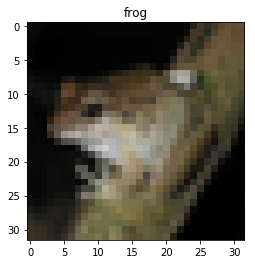

124


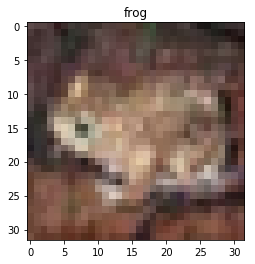

125


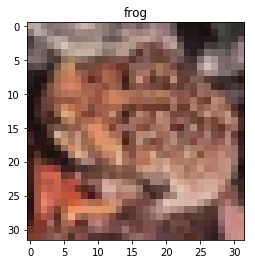

126


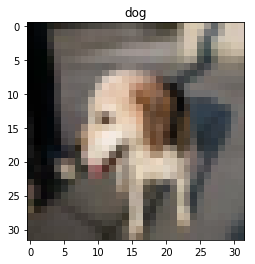

127


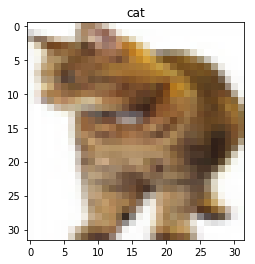

128


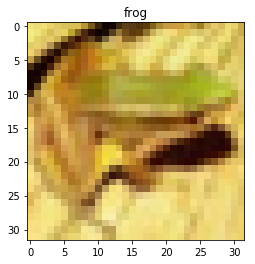

129


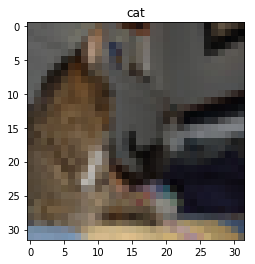

130


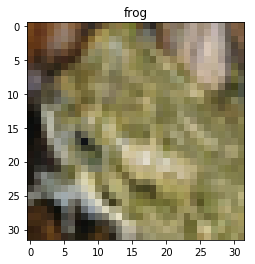

131


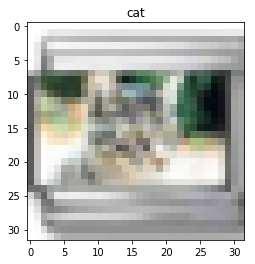

132


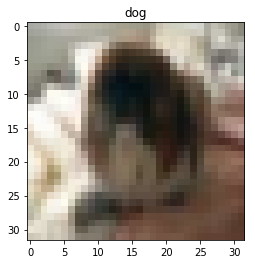

133


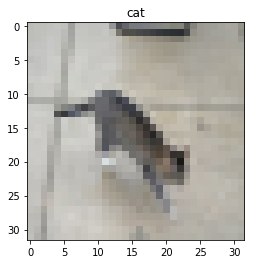

134


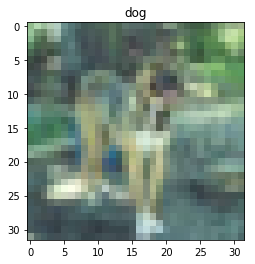

135


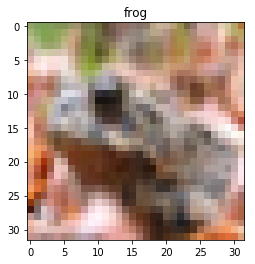

136


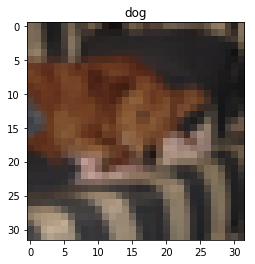

137


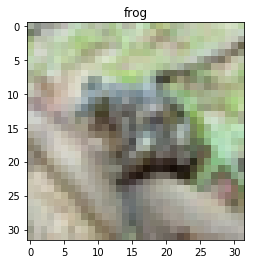

138


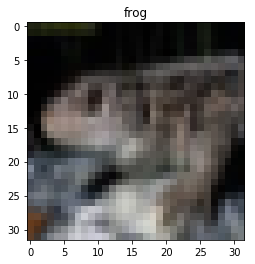

139


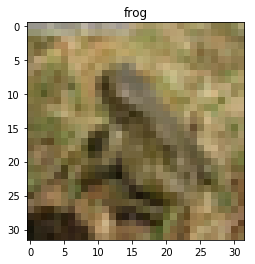

140


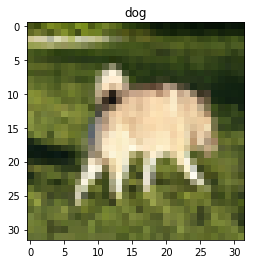

141


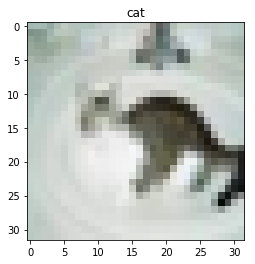

142


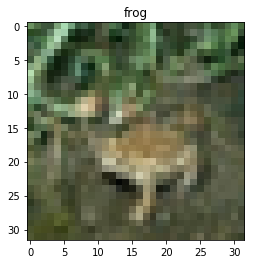

143


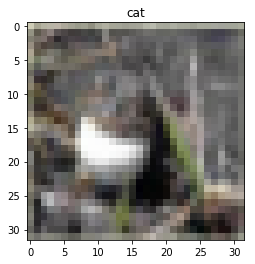

144


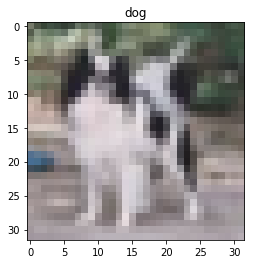

145


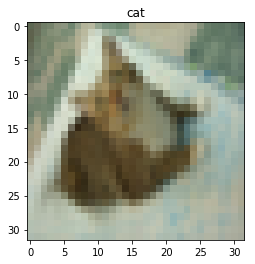

146


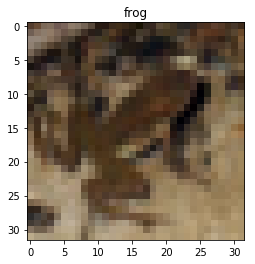

147


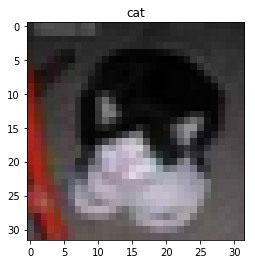

148


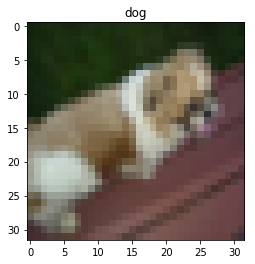

149


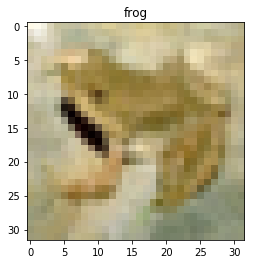

150


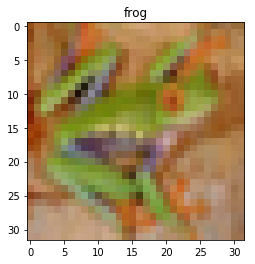

151


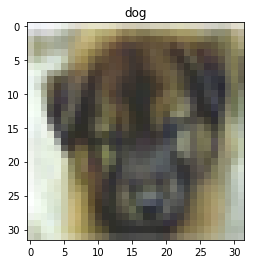

152


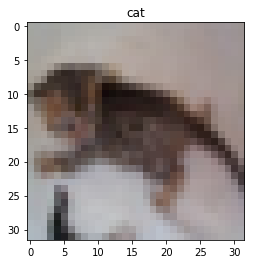

153


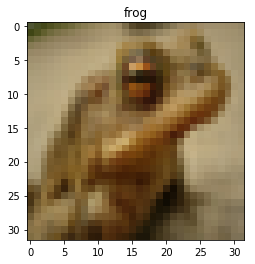

154


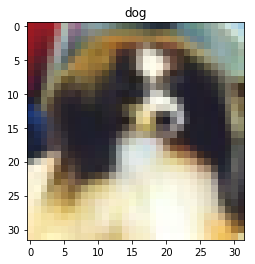

155


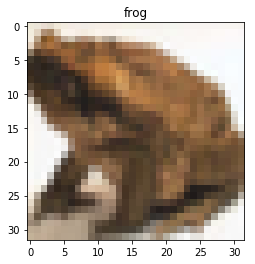

156


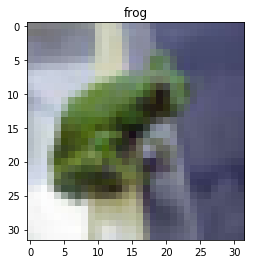

157


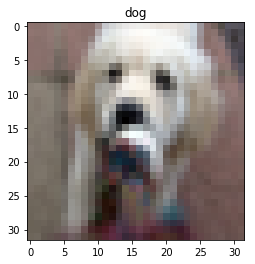

158


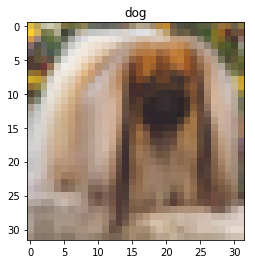

159


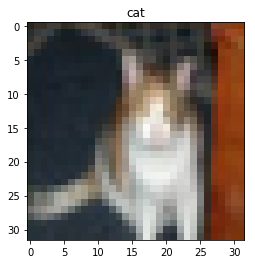

160


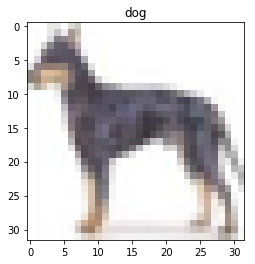

161


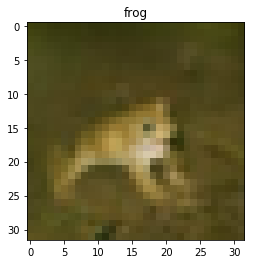

162


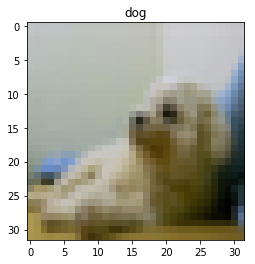

163


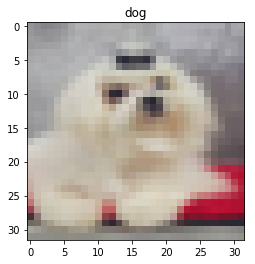

164


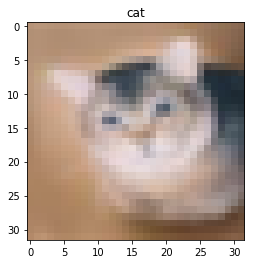

165


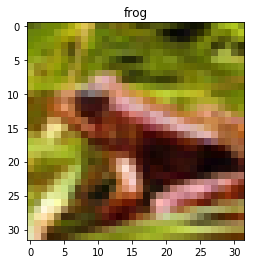

166


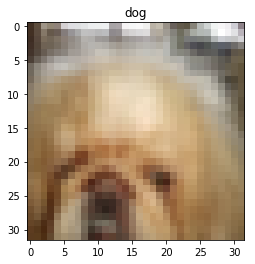

167


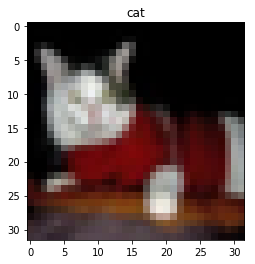

168


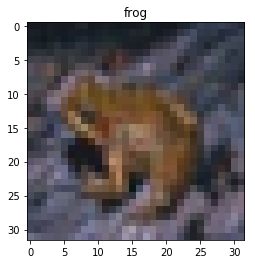

169


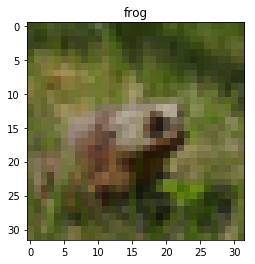

170


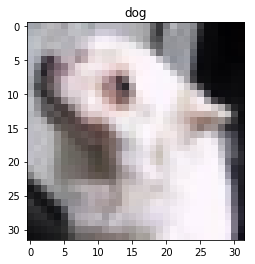

171


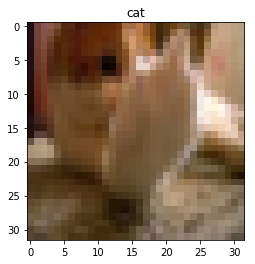

172


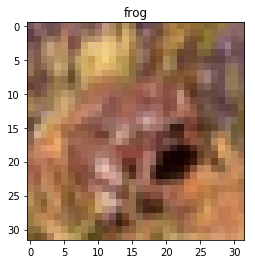

173


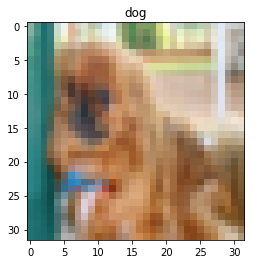

174


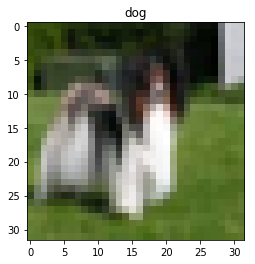

175


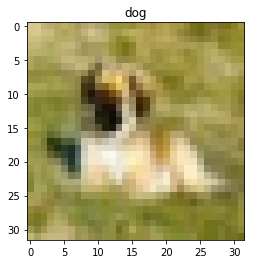

176


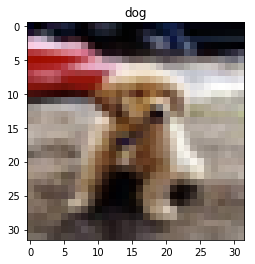

177


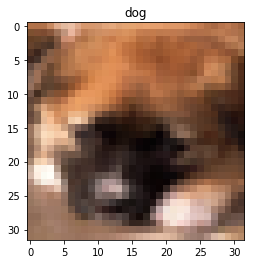

178


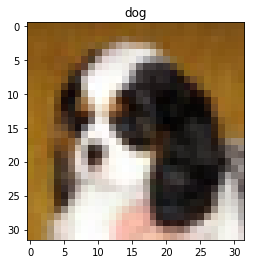

179


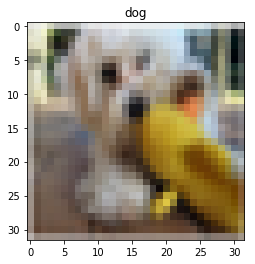

180


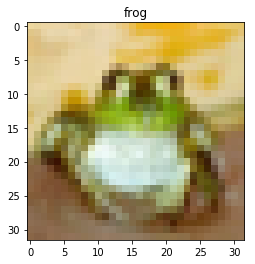

181


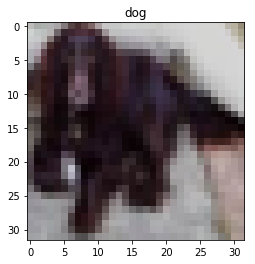

182


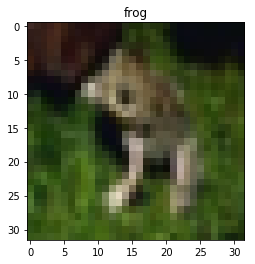

183


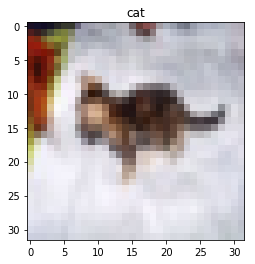

184


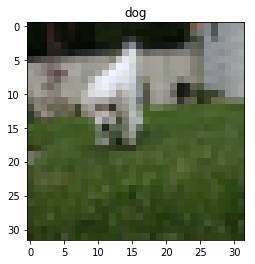

185


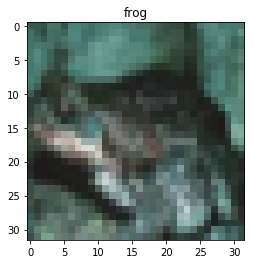

186


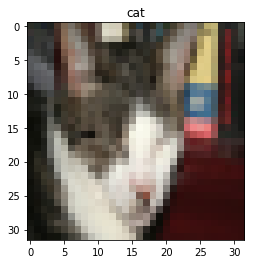

187


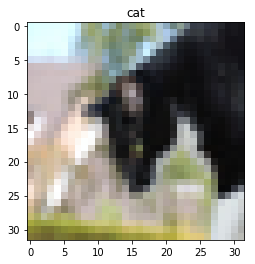

188


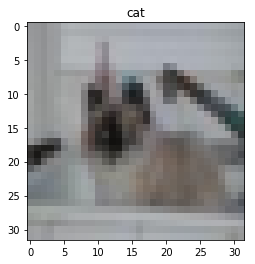

189


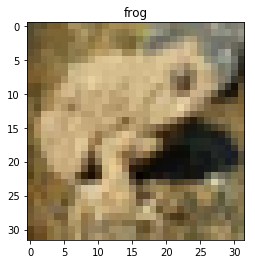

190


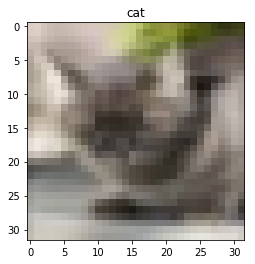

191


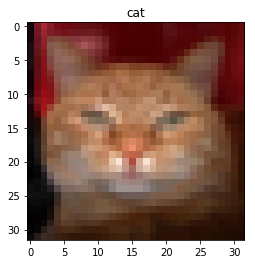

192


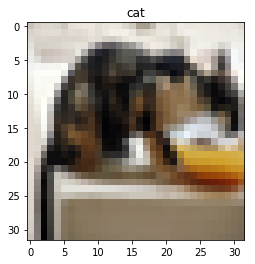

193


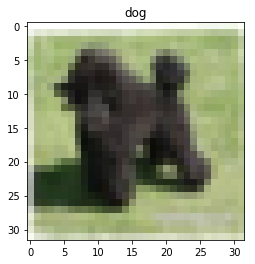

194


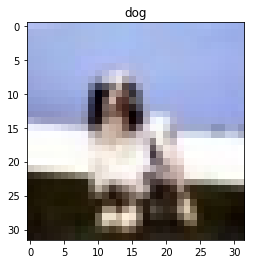

195


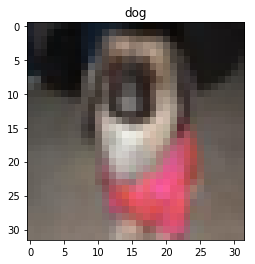

196


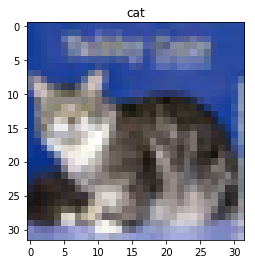

197


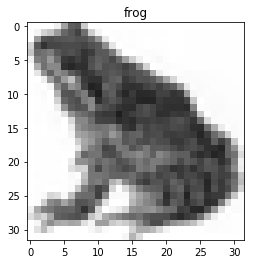

198


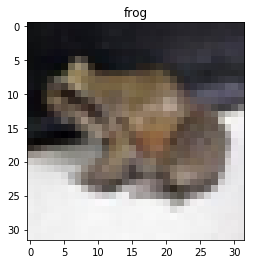

199


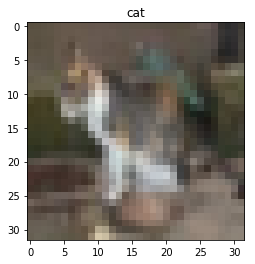

200


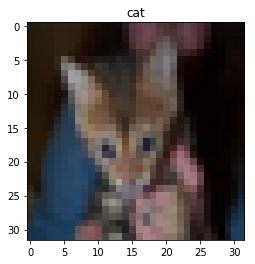

201


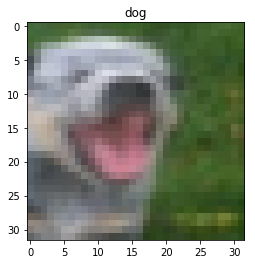

202


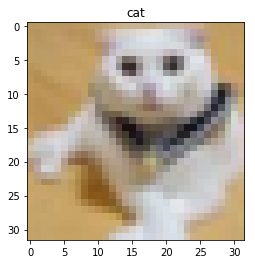

203


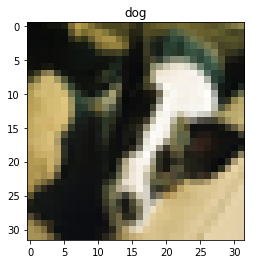

204


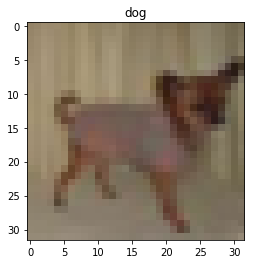

205


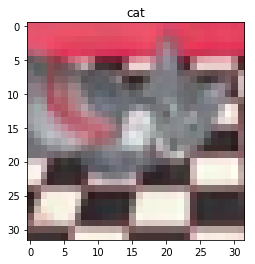

206


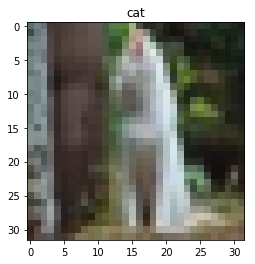

207


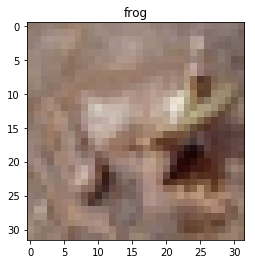

208


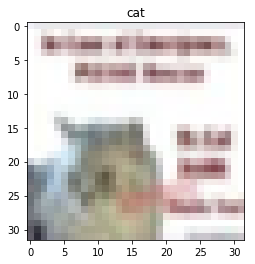

209


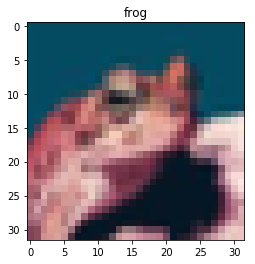

210


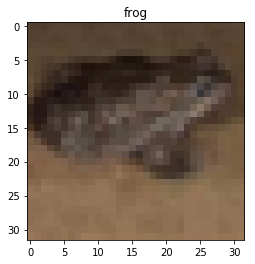

211


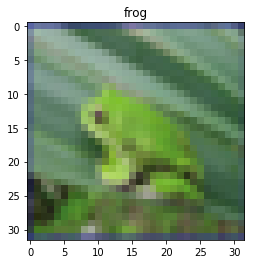

212


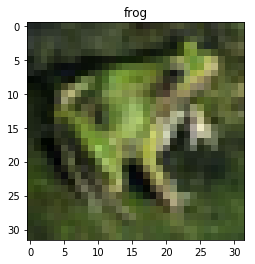

213


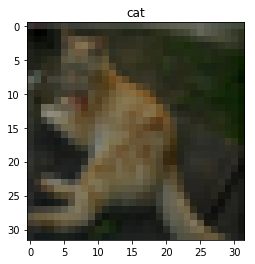

214


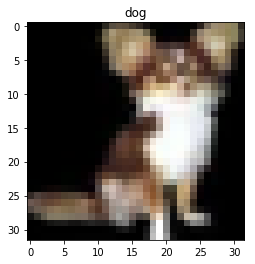

215


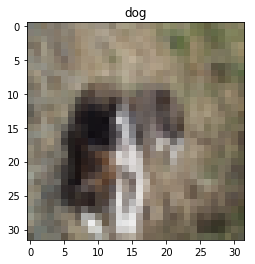

216


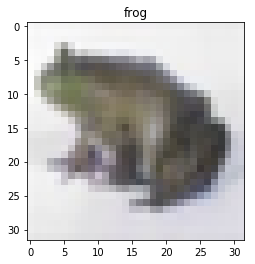

217


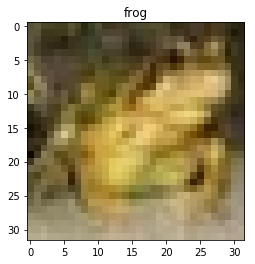

218


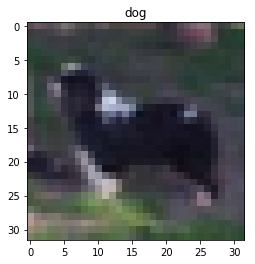

219


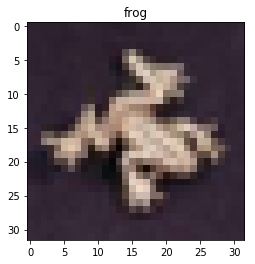

220


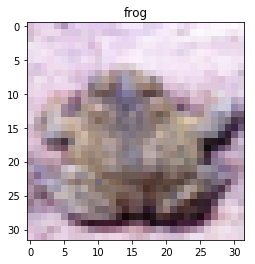

221


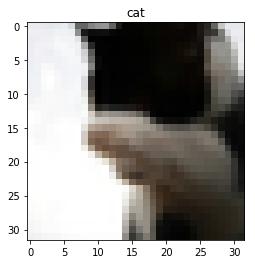

222


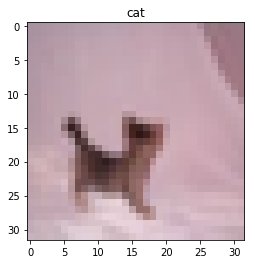

223


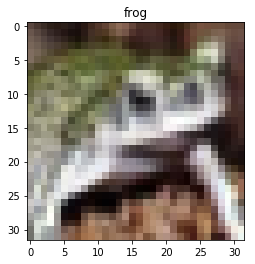

224


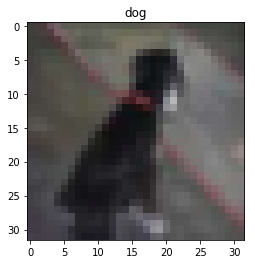

225


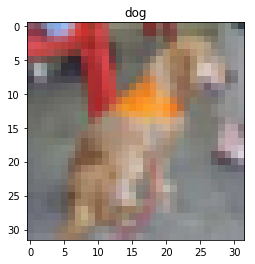

226


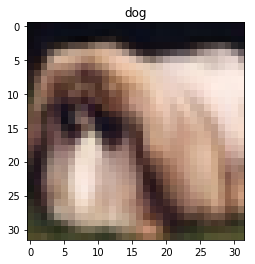

227


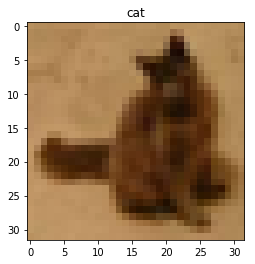

228


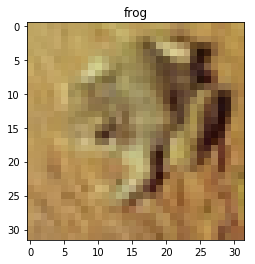

229


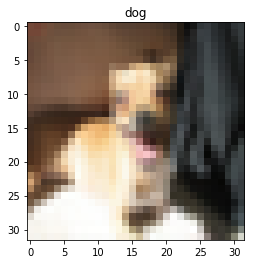

230


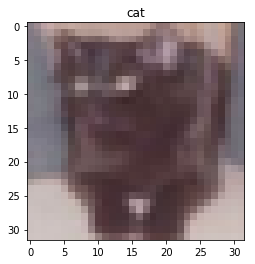

231


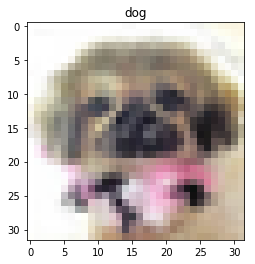

232


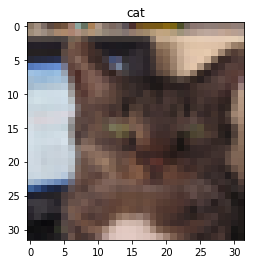

233


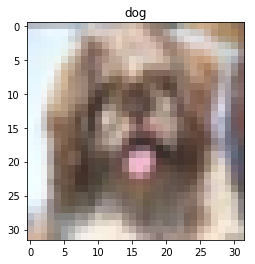

234


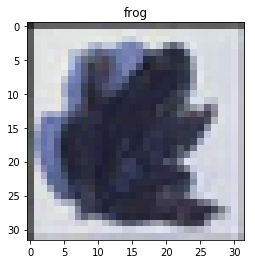

235


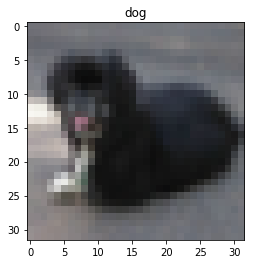

236


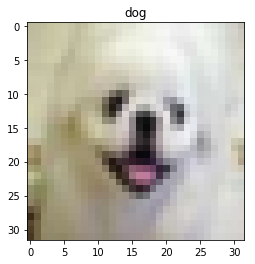

237


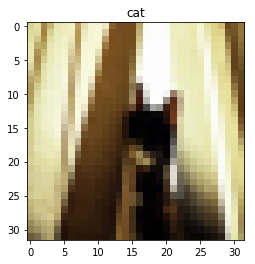

238


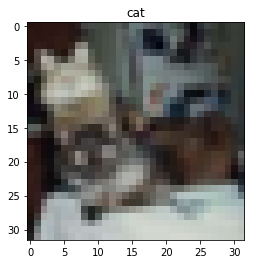

239


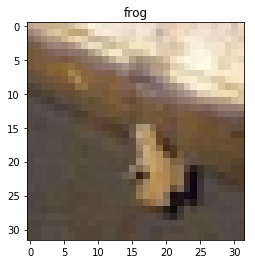

240


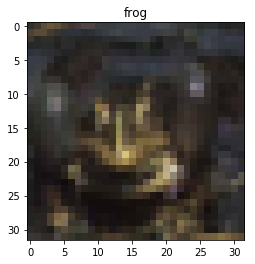

241


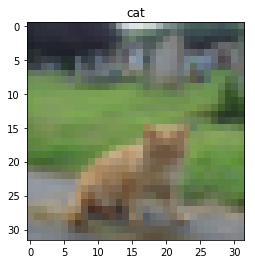

242


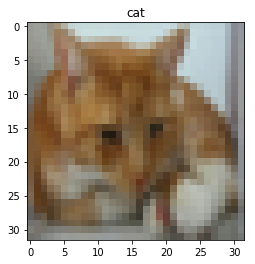

243


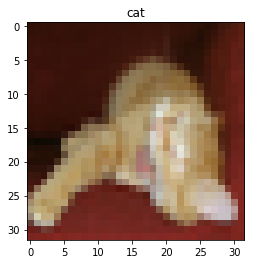

244


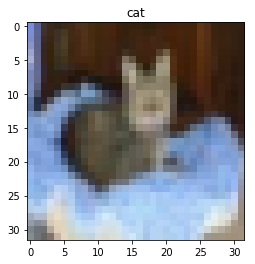

245


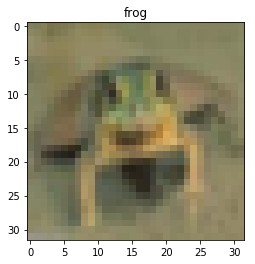

246


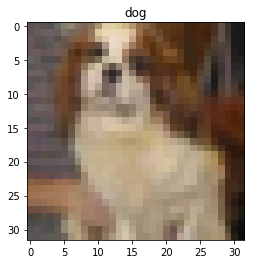

247


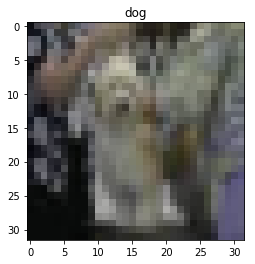

248


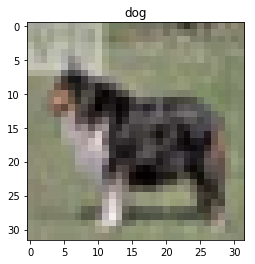

249


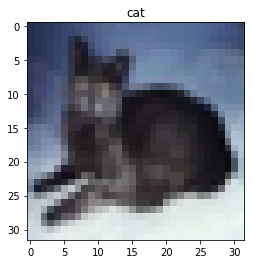

250


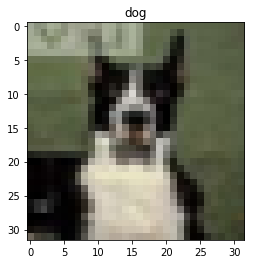

251


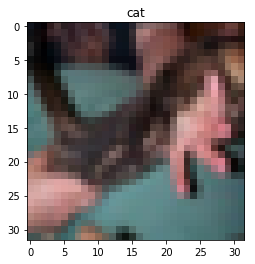

252


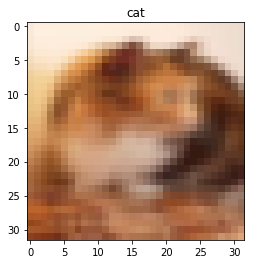

253


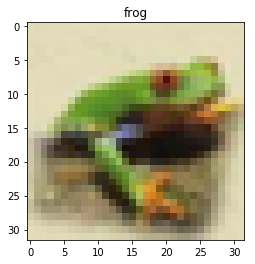

254


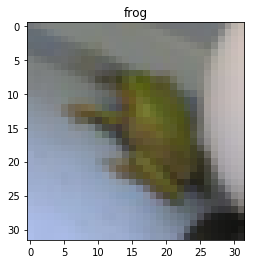

255


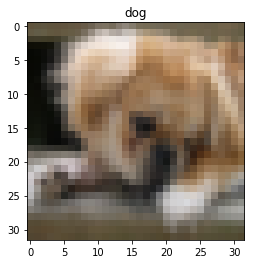

256


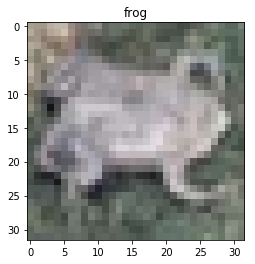

257


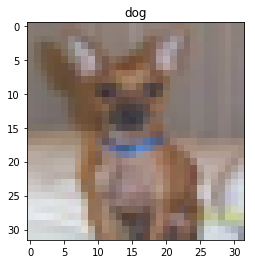

258


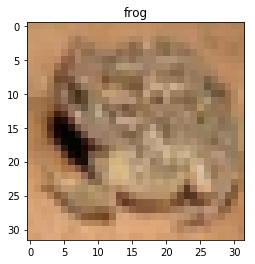

259


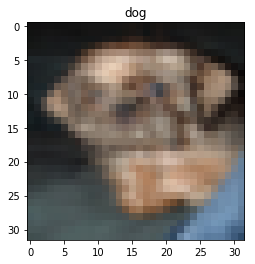

260


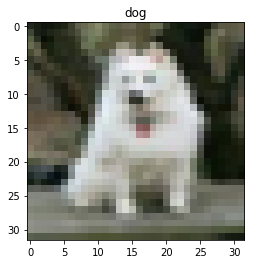

261


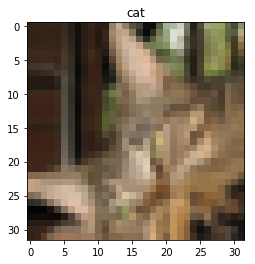

262


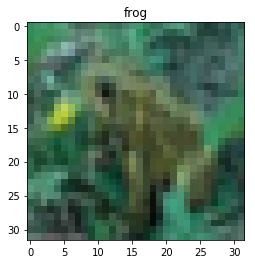

263


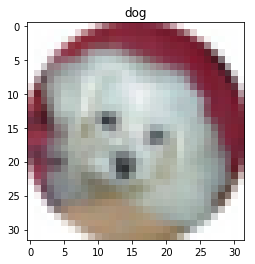

264


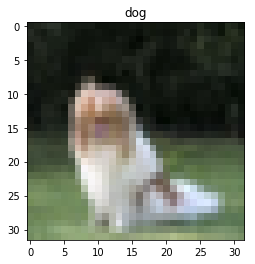

265


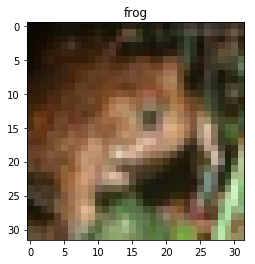

266


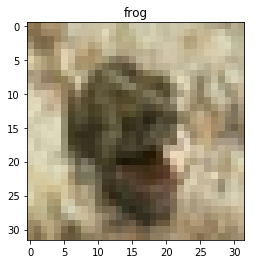

267


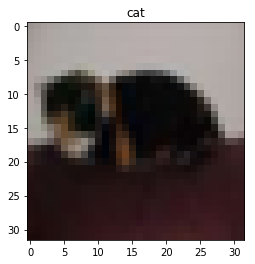

268


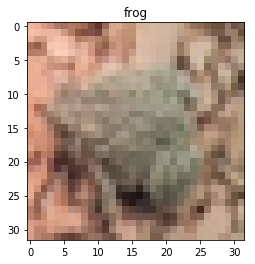

269


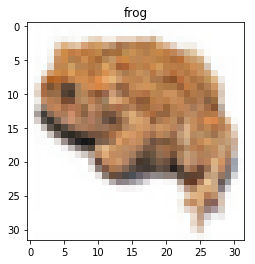

270


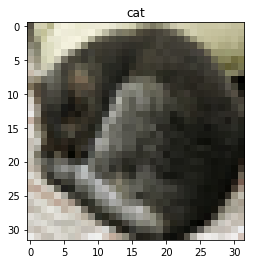

271


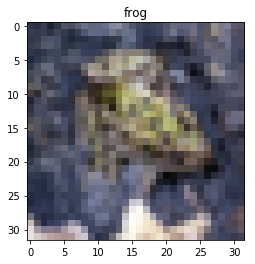

272


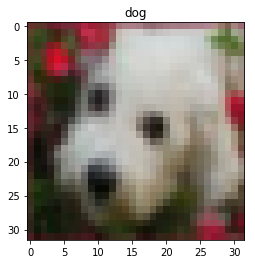

273


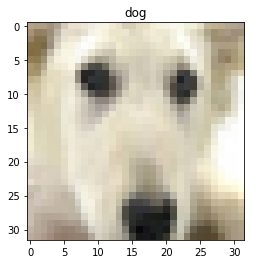

274


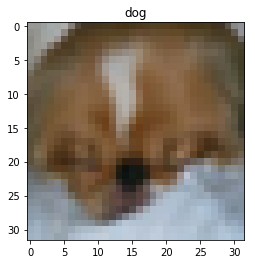

275


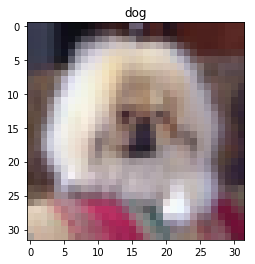

276


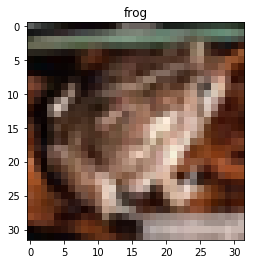

277


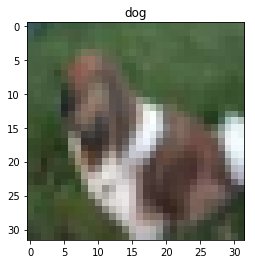

278


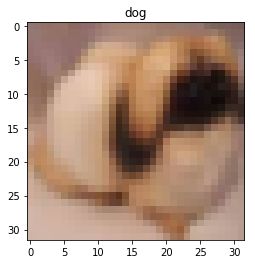

279


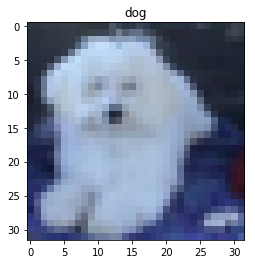

280


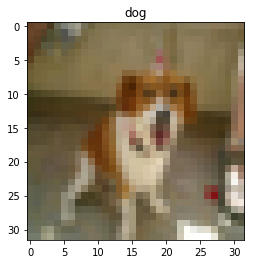

281


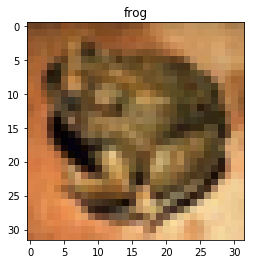

282


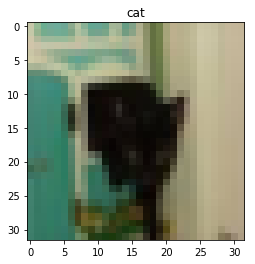

283


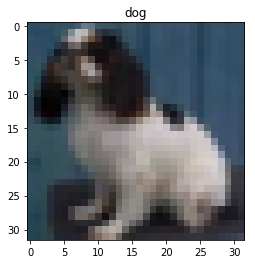

284


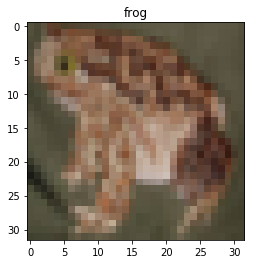

285


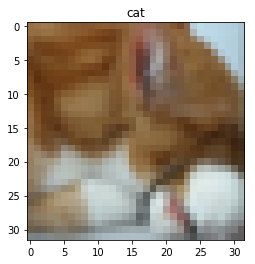

286


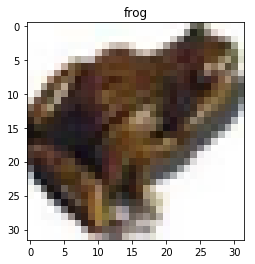

287


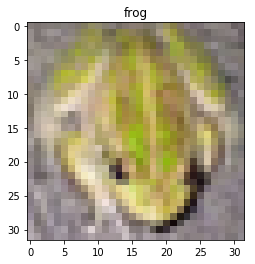

288


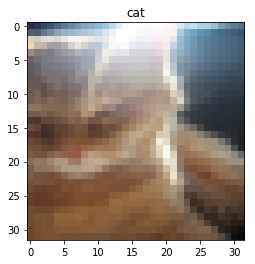

289


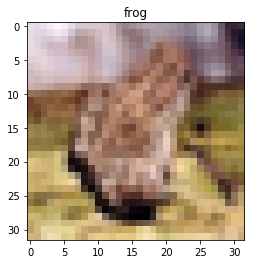

290


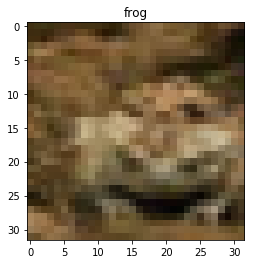

291


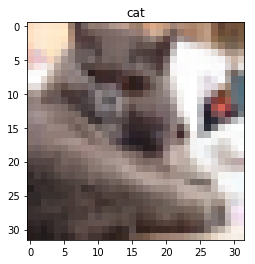

292


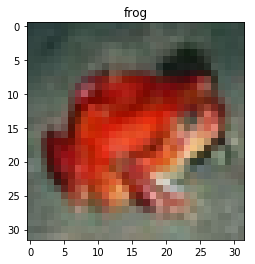

293


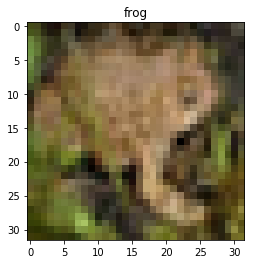

294


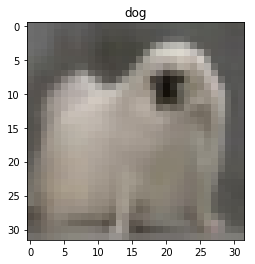

295


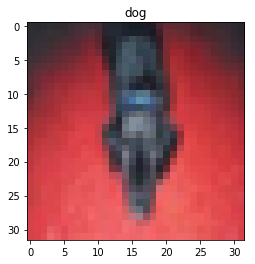

296


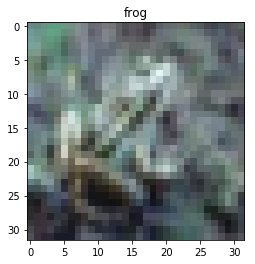

297


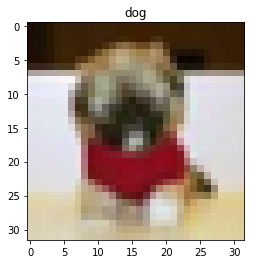

298


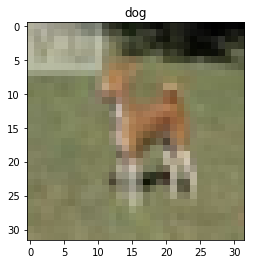

299


In [24]:
with np.load('prediction-challenge-02-data.npz') as fh:
    test_x = fh['test_x']
def tier(x):
    if x==0:
        return"cat"
    elif x==1:
        return"dog"
    elif x==2:
        return "frog"
    else:
        return"error"
for n in range(300):
    a=test_x[n]
    a=np.rollaxis(a,0,3)
    plt.title(tier(b[n]))
    plt.imshow(a)
    plt.show()
    print(n)

In [40]:
#Input Layer 
input_layer=tf.convert_to_tensor(test_cnn_x)[0:2]
#convolutional Layer #1
conv1 = tf.layers.conv2d(
    inputs=input_layer,
    filters=30,
    kernel_size=[5, 5],
    data_format="channels_first",
    padding="same",
    activation=tf.nn.relu)
#pooling layer #1
pool1 = tf.layers.max_pooling2d(
    inputs=conv1, 
    pool_size=[2, 2],
    strides=2,
    data_format="channels_first")
#convolutional Layer #2
conv2 = tf.layers.conv2d(
    inputs=pool1,
    filters=30,
    kernel_size=[3, 3],
    data_format="channels_first",
    padding="same",
    activation=tf.nn.relu)
#pooling layer #2
pool2 = tf.layers.max_pooling2d(
    inputs=conv2,
    pool_size=[2, 2],
    strides=2,
    data_format="channels_first")
#convolutional Layer #3
conv3 = tf.layers.conv2d(
    inputs=pool2,
    filters=32,
    kernel_size=[3, 3],
    data_format="channels_first",
    padding="same",
    activation=tf.nn.relu)
#pooling layer #3
pool3 = tf.layers.max_pooling2d(
    inputs=conv3,
    pool_size=[2, 2],
    strides=2,
    data_format="channels_first")

mode=tf.estimator.ModeKeys.PREDICT

#dense layers
#flatten pictures
pool3_flat=tf.reshape(pool3,[-1,pool3.shape[1]*pool3.shape[2]*pool3.shape[3]])
#dense layer #1
dense1 = tf.layers.dense(
        inputs=pool3_flat,
        units=256,
        activation=tf.nn.relu)
#dropout to avoid overfitting
dropout1 = tf.layers.dropout(
        inputs=dense1,
        rate=0.4,
        training=mode == tf.estimator.ModeKeys.TRAIN)
#dense layer #2
dense2 = tf.layers.dense(
        inputs=dropout1,
        units=128,
        activation=tf.nn.relu)
#dropout to avoid overfitting
dropout2 = tf.layers.dropout(
        inputs=dense2,
        rate=0.4,
        training=mode == tf.estimator.ModeKeys.TRAIN)
#final output dense layer
logits= tf.layers.dense(inputs=dense2, units=3)


predictions = {
    #makes predictions by highest output
    "classes": tf.argmax(input=logits, axis=1),
    #set logits to sum=1 (probabilitys)
    "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
}



In [41]:
predictions

{'classes': <tf.Tensor 'ArgMax_3:0' shape=(2,) dtype=int64>,
 'probabilities': <tf.Tensor 'softmax_tensor_3:0' shape=(2, 3) dtype=float32>}

In [34]:
print(conv1)
print(pool1)
print(conv2)
print(pool2)
print(conv3)
print(pool3)
print(pool3_flat)
print(dense1)
print(dense2)
print(dropout2)
print(logits)

Tensor("conv2d_25/Relu:0", shape=(2, 30, 32, 32), dtype=float32)
Tensor("max_pooling2d_25/MaxPool:0", shape=(2, 30, 16, 16), dtype=float32)
Tensor("conv2d_26/Relu:0", shape=(2, 30, 16, 16), dtype=float32)
Tensor("max_pooling2d_26/MaxPool:0", shape=(2, 30, 8, 8), dtype=float32)
Tensor("conv2d_27/Relu:0", shape=(2, 32, 8, 8), dtype=float32)
Tensor("max_pooling2d_27/MaxPool:0", shape=(2, 32, 4, 4), dtype=float32)
Tensor("Reshape_8:0", shape=(2, 512), dtype=float32)
Tensor("dense_21/Relu:0", shape=(2, 256), dtype=float32)
Tensor("dense_22/Relu:0", shape=(2, 128), dtype=float32)
Tensor("dropout_6/dropout/mul:0", shape=(2, 128), dtype=float32)
Tensor("dense_23/BiasAdd:0", shape=(2, 3), dtype=float32)
